In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Image Processing with Neural Network
## Template 01

## Template with helper functions

- Moons Dataset
- Decision Boundary
- Loss curve

<img src='../../../images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align = "left"/>

## Import Statements

In [ ]:
3007_A02_NAME.ipynb

In [5]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
 
# from utils.helper import fn_plot_decision_boundary # this function is from helper.py

In [6]:
# print (fn_plot_decision_boundary.__doc__)

## Setup Global Parameters

In [102]:
###----------------
### Some parameters
###----------------

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 1500 # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (8, 5),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [220]:
def fn_plot_decision_boundary(predict, X, wts):
    
    # initialize the figure
    fig, ax = plt.subplots(figsize = (8,5));
    
    # Small increment to create object function surface
    dm = 0.001
    
    # Range of X values (First feature)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    
    # Range of Y values (Second feature)
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Create a grid to evaluate the object function
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    # flatten and stack
    # arrays will be stacked along their last axis after being upgraded to at least 2-D 
    # with 1’s post-pended to the shape (column vectors made out of 1-D arrays)
    XX = np.c_[xx.ravel(), yy.ravel()] 

    # add another column filled with 1 to make it work with the predict function
    XX = np.hstack( ( XX, np.ones((XX.shape[0],1)) ) )
    
    # list to collect predictions
    y_pred = []
    
    # Iterate over rows
    for row in (XX):


        a = predict(row, wts)
        y_p=0
        if a>=0.5:
            y_p=1
        y_pred.append(y_p)
        
    Z = np.array(y_pred).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=X[:, 2],
                                  s=20, edgecolor='k', cmap=plt.cm.bwr)
    ax.set_title('Decision Boundary')

    ax.set_xlabel('A')
    ax.set_ylabel('B')
    plt.show()

## Generate Data Set
<div style="font-family: Arial; font-size:1.2em;color:black;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [191]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, noise=NOISE,shuffle=True,
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0], dtype=int64))

In [193]:
data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [195]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [197]:
data_df.describe() # Generate descriptive statistic

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


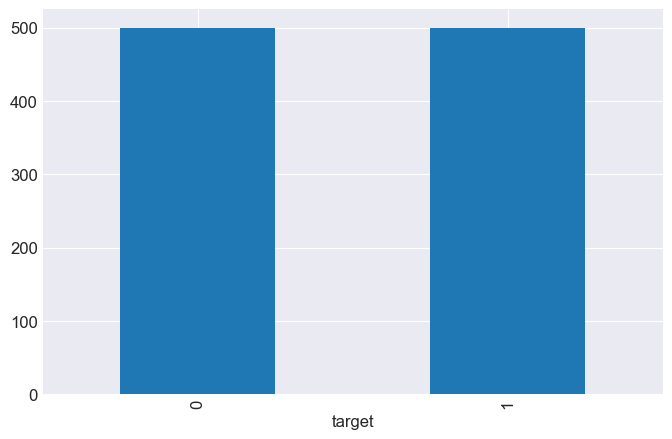

In [199]:
fig, ax = plt.subplots() # Instantiate
    
data_df['target'].value_counts().plot(ax=ax, kind='bar');

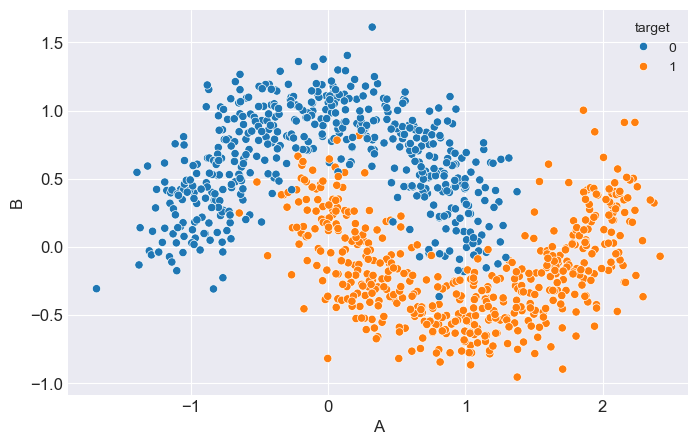

In [201]:

ax = sns.scatterplot(data=data_df, 
                     x='A', y='B', 
                     hue='target'); 

In [202]:
data_train = data_df[:900].to_numpy()
data_test = data_df[900:].to_numpy()
data_train.shape, data_test.shape

((900, 3), (100, 3))

###Perceptron
z=w0+ x1*w1+ x2*w2
z>= 0 a=1

In [206]:
def fn_sigmoid(z):
    sig_z= 1.0 / (1 + np.exp(-z))
    return sig_z

In [208]:
def predict(row, wts):
    z= wts[0]
    for i in range(len(row)-1):
        z+=wts[i+1]*row[i]
    return fn_sigmoid(z)

In [210]:
    def train_weights(train, alpha, n_epochs):
    
        errors=[] #store all errors
    
        weights = rng.random(train.shape[1])
        m = train.shape[0]
        for epoch in np.arange(n_epochs):
            
            sum_error = 0.0
            
            for row in train:
               
                prediction = predict(row, weights)
                
                dz= prediction - row[-1] #(a-y)
               
                sum_error += (prediction - row[-1])**2
                
                weights[0]= weights[0]- alpha* dz/ m # update w0
                
                for i in range(len(row)-1):
                 
                    weights[i+1] += -alpha*dz* row[i]/m 
             
            errors.append(sum_error)
        return weights, errors

In [212]:
weights,errors= train_weights(data_train,ALPHA,EPOCHS)

In [213]:
# weights = rng.random(data_train.shape[1])
# weights

In [214]:
predictions=[]

for row in data_train:
    prediction = predict(row,weights)
    pred=0
    if prediction>=0.5:
        pred =1
       
    predictions.append(pred)

accuracy_score(y_pred=predictions,y_true=data_train[:,-1])

0.8655555555555555

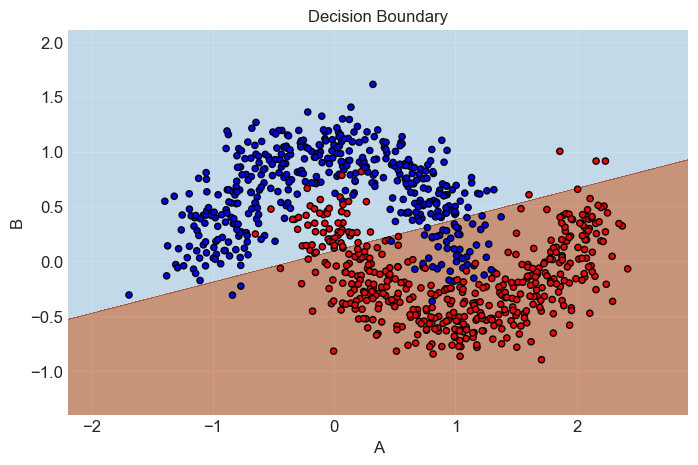

In [222]:
fn_plot_decision_boundary(predict, data_train, weights)

In [178]:
cm= confusion_matrix(y_true= data_train[:,-1],y_pred=predictions)
cm

array([[385,  57],
       [ 64, 394]], dtype=int64)

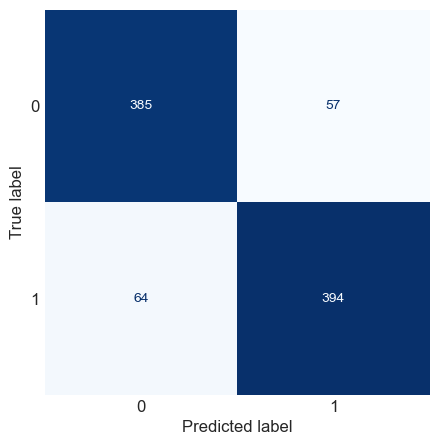

In [180]:
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues', colorbar=False)
plt.grid()
plt.show()

In [182]:
len(predictions), data_test.shape

(900, (100, 3))

In [184]:
# predictions=[]
# for row in data_test:
#     prediction = predict(row,weights)
#     predictions.append(prediction)

# print(f'Test Acuuracy :{accuracy_score(y_pred=predictions,y_true=data_test[:,-1])}')

# cm= confusion_matrix(y_true=data_test[:,-1], y_pred=predictions)

# disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
# disp.plot(cmap='Blues', colorbar=False)
# plt.grid()
# plt.show()



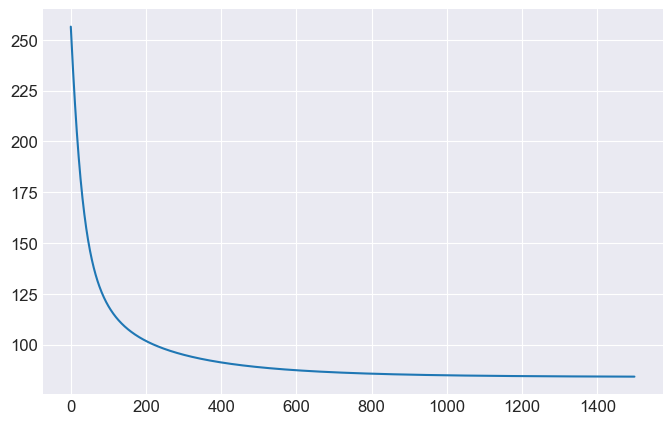

In [186]:
plt.plot(errors)